In [1]:
import warnings
warnings.filterwarnings('ignore')
import pickle
with open('capita_pred.pkl','rb') as f:
    chatgpt = pickle.load(f)

print('done')

done


In [2]:
year = float(input('enter year to predict capita: '))

final_year = [[year]]

capita = round(chatgpt.predict(final_year)[0],2)

print(f'''
year: {int(year)}
capita in USD($): {capita}''')

enter year to predict capita:  2015



year: 2015
capita in USD($): 37146.37


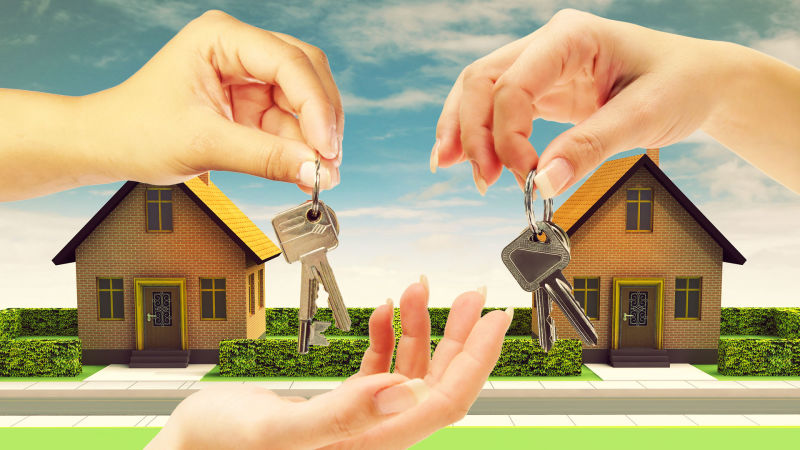

In [3]:
import IPython
IPython.display.Image('https://i-media.vyaparify.com/vcards/blogs/95898/Buysell1.jpg')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, root_mean_squared_error
# dataset
from sklearn.datasets import fetch_california_housing
print('Modules Loaded Successfully!!')

Modules Loaded Successfully!!


In [5]:
# STEP 2 LOAD DATA CREATE DF

In [6]:
data_dict = fetch_california_housing()
data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
print(data_dict['target_names'])

['MedHouseVal']


In [9]:
df = pd.DataFrame(data_dict['data'],
                  columns = data_dict['feature_names'])
df['MedHouseVal'] = data_dict['target']

print('Data Loaded Successfully!!')

Data Loaded Successfully!!


In [10]:
# STEP3: UNDERSTANDING DATA USING EDA

In [11]:
# Shape
df.shape

(20640, 9)

In [12]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
# Checking Null values
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [14]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [15]:
# hundreds of thousands of dollars ($100,000) 1 lakh Dollars
# average number of household members
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20533,4.2432,13.0,6.350569,1.053775,2553.0,2.640124,38.54,-121.67,3.265


In [16]:
# All data Must be in Numerical, Dataset contains all values in numerical
# We can proceed this for Analysis

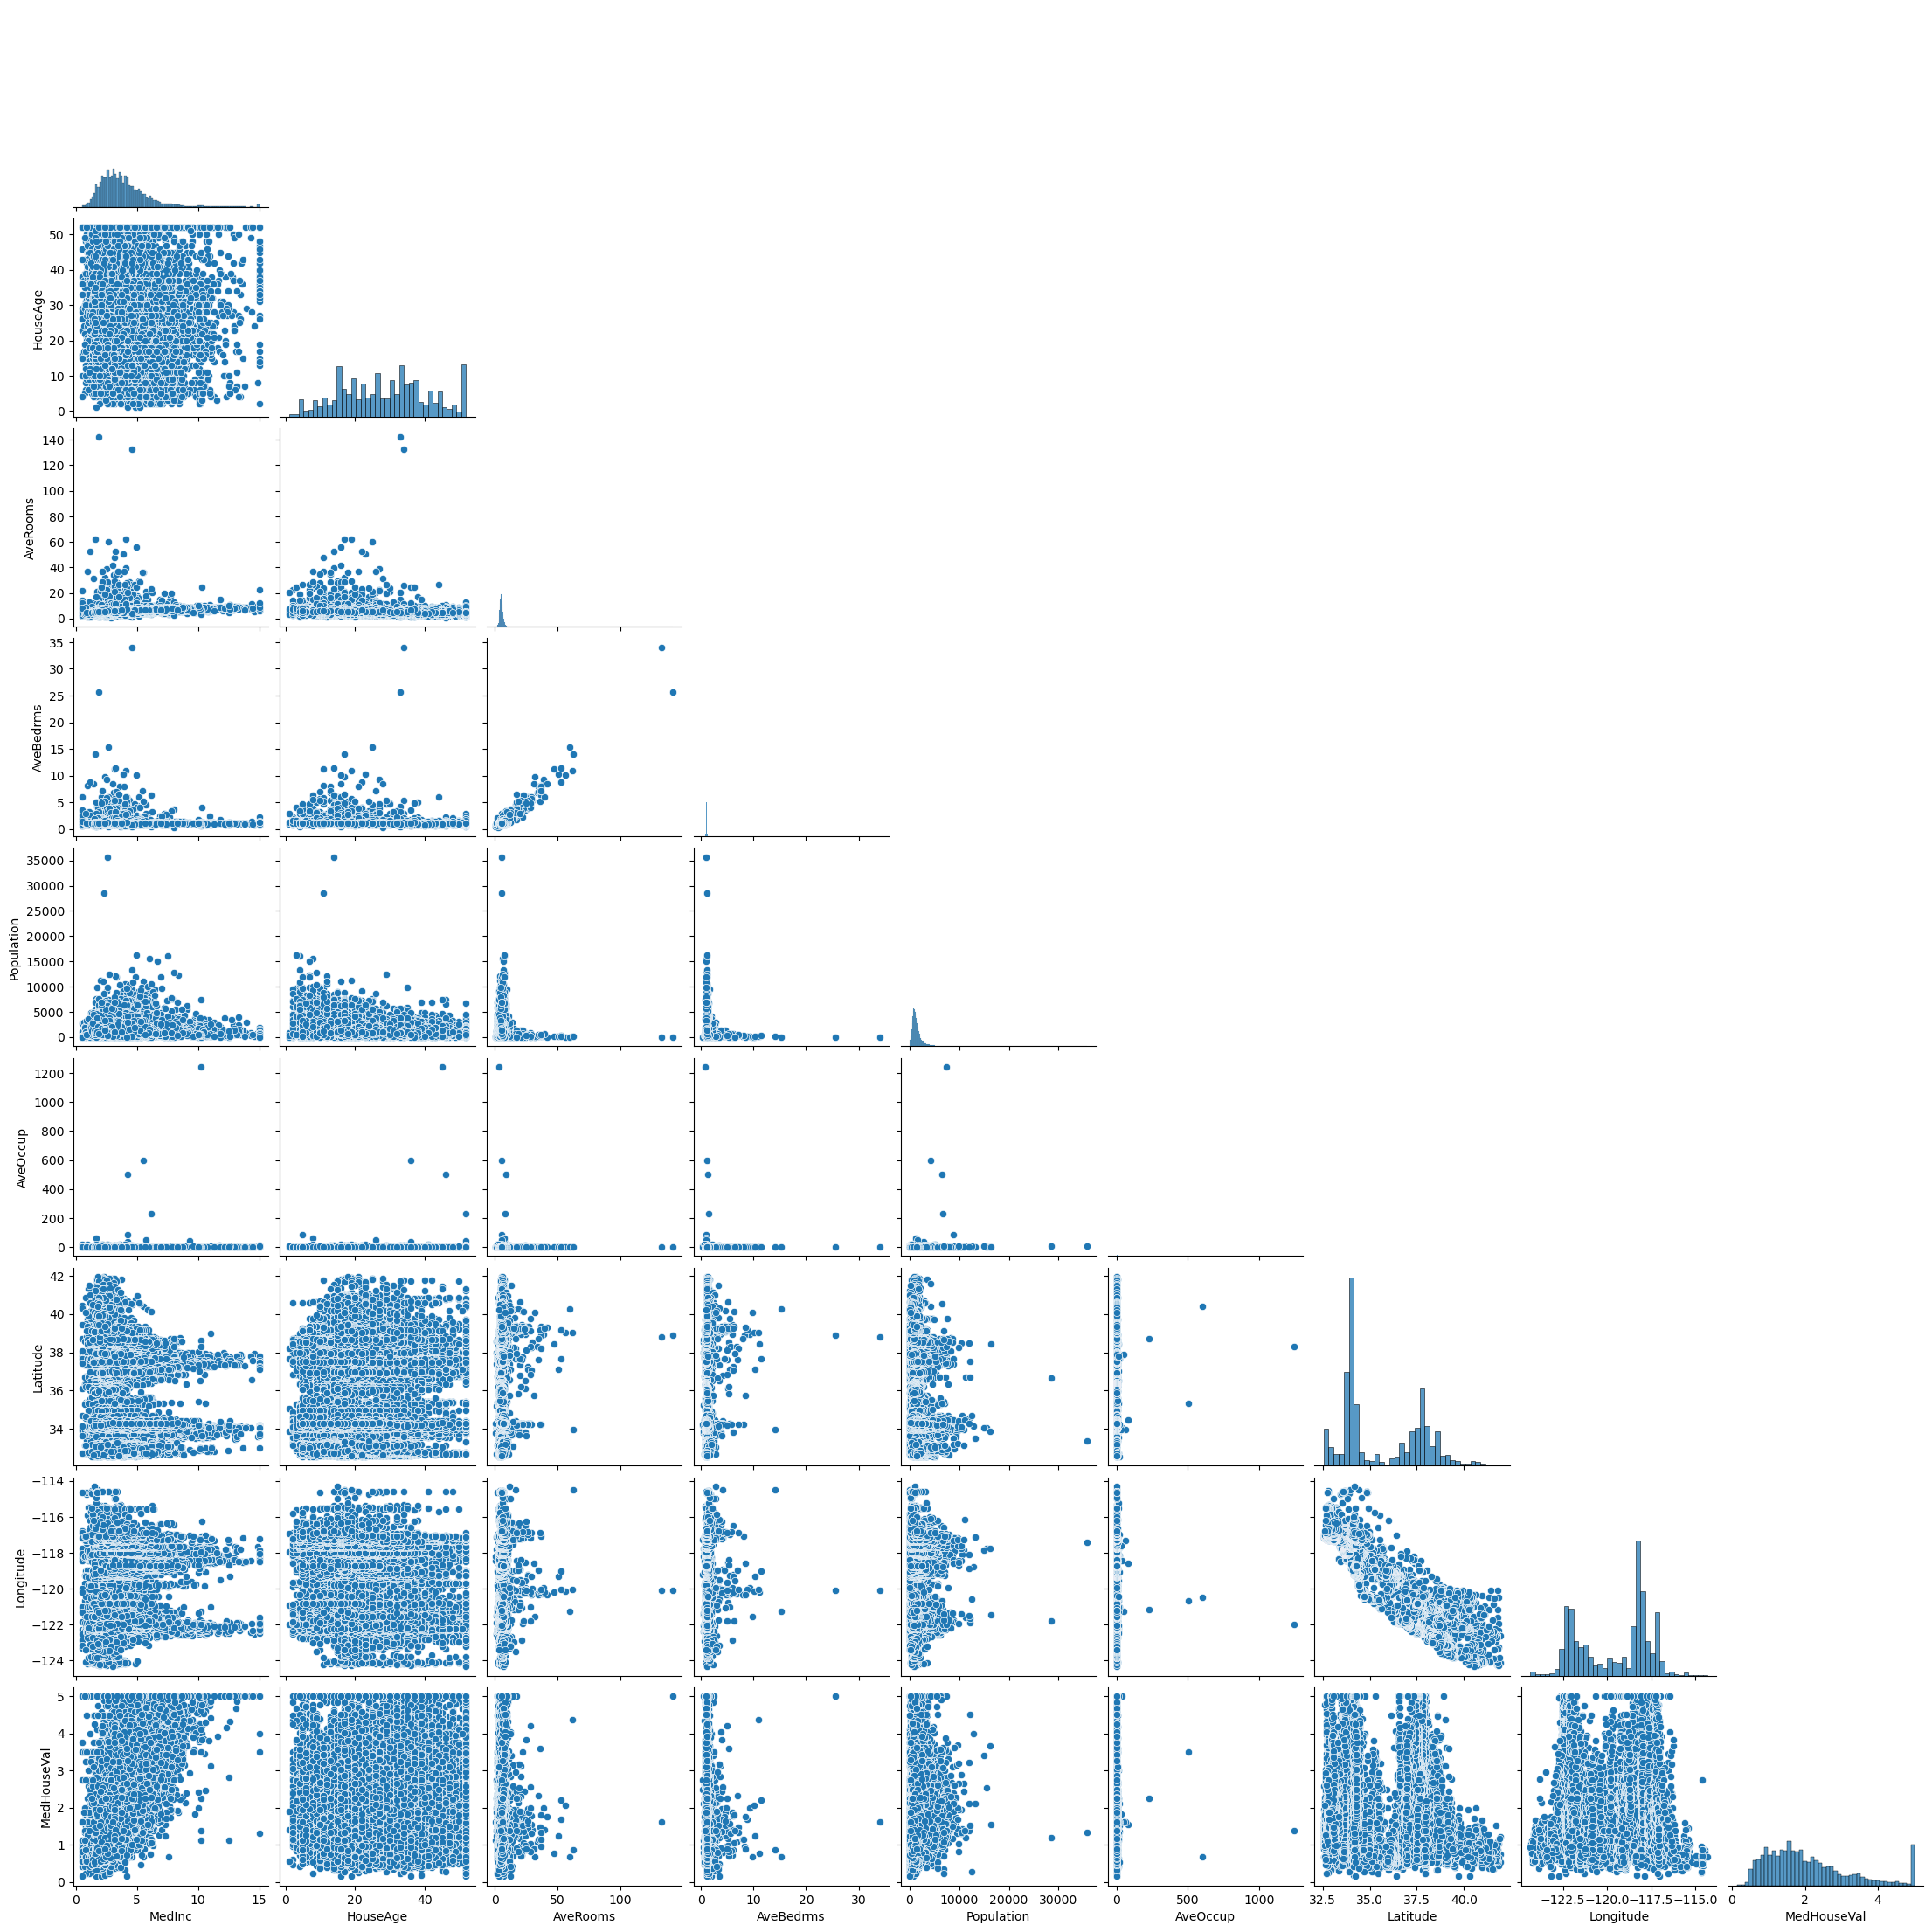

In [17]:
# checking data distribution

sns.pairplot(data = df,corner=True)
plt.show()

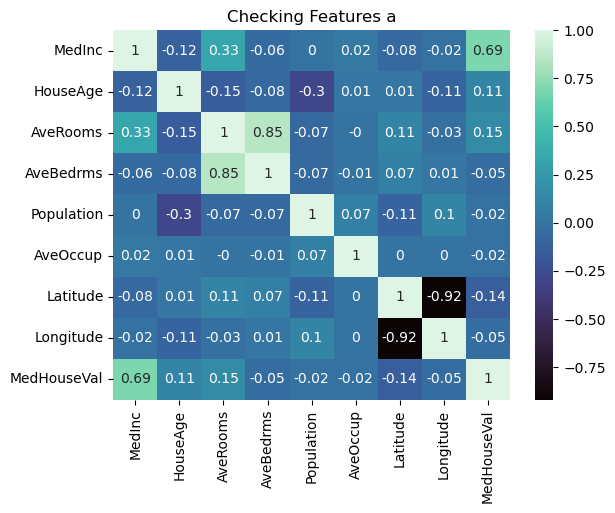

In [18]:
# checking data distribution

plt.title('Checking Features a')
sns.heatmap(df.corr().round(2), annot = True,cmap='mako')
# cmap = color_map ( -1 to 1)
plt.show()

In [19]:
# Data Describe()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


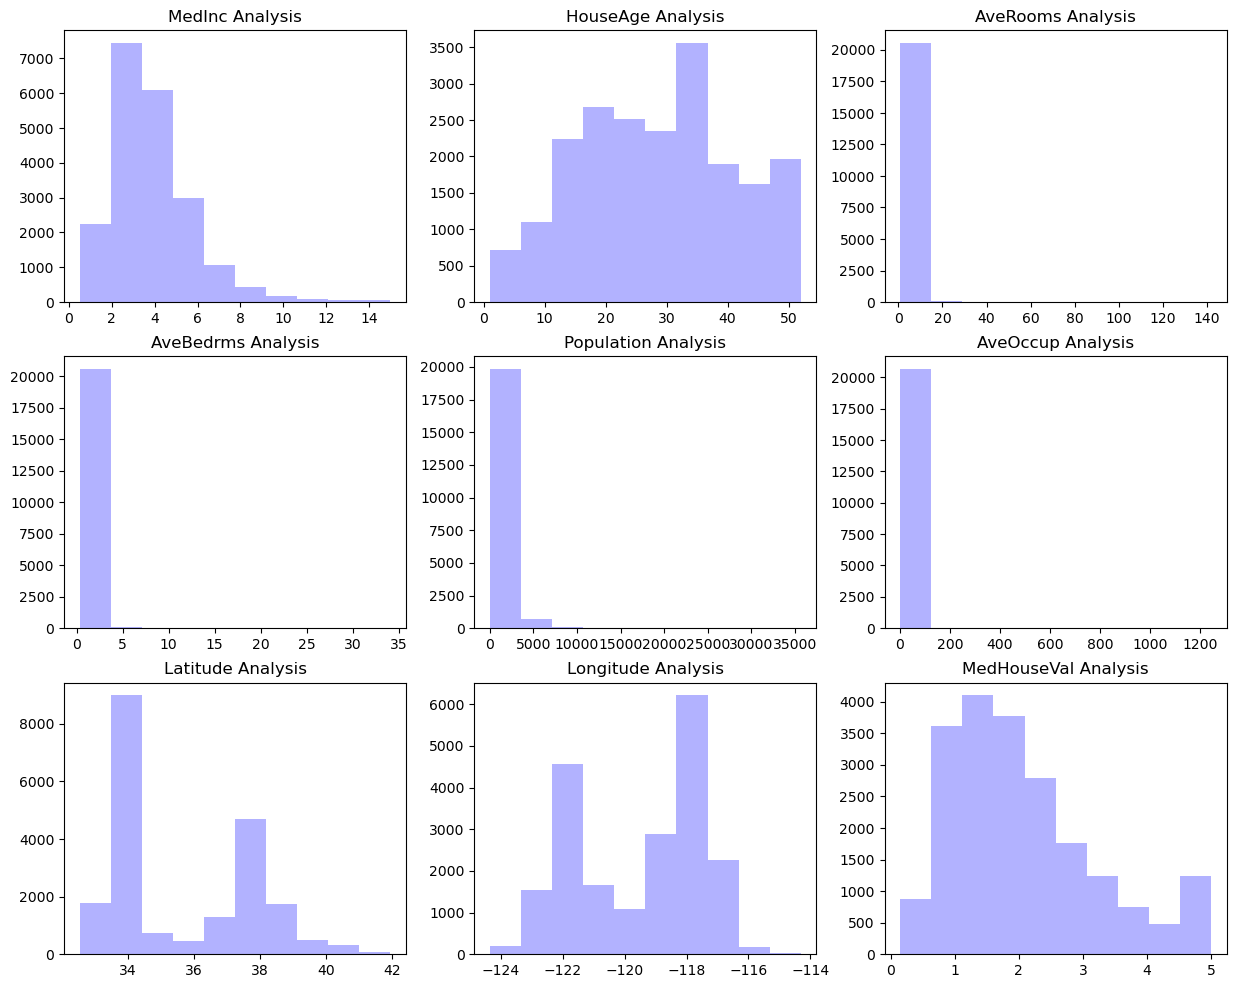

In [20]:
plt.figure(figsize = (15,12))
for i,j in enumerate(df.columns):
  plt.subplot(3,3, i+1)
  plt.hist(df[j],color = 'blue', alpha = 0.3)
  plt.title(j+' Analysis')
plt.show()

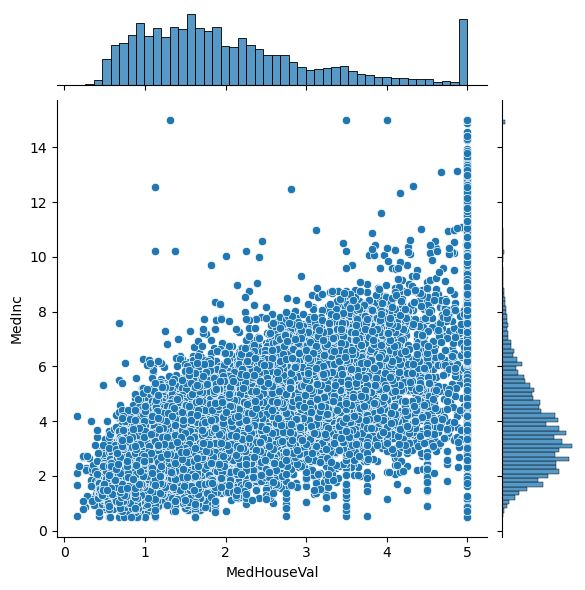

In [21]:
# Distribution of target Value MedHousevalue vs MedInc

sns.jointplot(data = df, x = 'MedHouseVal', y = 'MedInc')
plt.show()

In [22]:
# sns.regplot(data = df, x = 'MedHouseVal', y = 'MedInc')
# plt.show()

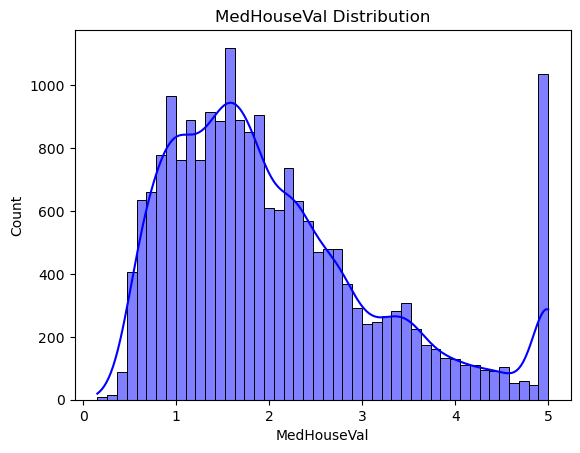

In [23]:
plt.title('MedHouseVal Distribution')
sns.histplot(data = df, x = 'MedHouseVal', color = 'b',kde= True)
plt.show()

In [24]:
df['MedHouseVal'].describe()
# 75 % of price less than 2.64 lakh dollars

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [25]:
# STEP4: FEATURE ENGINEERING AND PREPROCCESSING

In [26]:
# normalization = MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,:-1]
y = df['MedHouseVal']



scaler = MinMaxScaler()

scaler.fit(X)  # Learning
X_scaled = scaler.transform(X)

print('done')

done


In [27]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0000000000000002


In [28]:
# Step 5: Train test Split: Split Data for Training and testing Part

In [29]:
# Train Test Split: Divide into train part-test part
# Train Test Split: Func: divide
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size =.2, random_state = 150)
print('Done')

Done


In [30]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (16512, 8)
Shape of X_test (4128, 8)
Shape of y_train (16512,)
Shape of y_test (4128,)


In [31]:
X_scaled.shape


(20640, 8)

In [32]:
df.shape

(20640, 9)

In [33]:
# step: 6 model building

In [34]:
# step: 6.1 Linear Model using linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()  #object creation

lr_model.fit(X_train,y_train)  #training model

LinearRegression()

In [36]:
# step: 6.1.2

In [37]:
# test data: X_test

y_pred = lr_model.predict(X_test)
print('done')

done


In [38]:
# 20%: Actual answer: y_test, predicted: y_pred

lr_compare_df = pd.DataFrame({'Actual House Price':y_test,
              'Predicted House price':y_pred})
print('done')

done


In [39]:
lr_compare_df

,Actual House Price,Predicted House price
13569,0.93300,1.600182
6743,2.79900,2.290845
13230,3.92900,2.618237
18799,0.52000,0.209449
1052,1.23600,1.236397
...,...,...
19369,2.68800,2.276322
12808,0.69300,0.976300
6589,5.00001,3.410402
19719,0.71200,0.896588


In [40]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('Lr MAE',lr_mae)

Lr MAE 0.5295622016018943


In [41]:
lr_mse = mean_squared_error(y_test,y_pred)
print('Lr MSE',lr_mse)

Lr MSE 0.5322170539831861


In [42]:
lr_rmse = lr_mse**.5
print('Lr rmse',lr_rmse)

Lr rmse 0.7295320787896761


In [43]:
# training score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score',lr_train_score)

# testing score
lr_test_score = lr_model.score(X_test,y_test)
print('Testing Score',lr_test_score)

Training Score 0.6081032361747606
Testing Score 0.5984024263886711


In [44]:
# Model Score: apx: 60%, Model not that much good, we need more parameter tuning
# Alternate Model call
# feature vs feature high corr( X col:8)
# (VIF)variance Infaltion Factor> 10, we can drop that col
# Bias vs Variance Trade off: Intersect

# Training score: high,  testing score: low = overfitting
# Training score: low,  testing score: low = underfit
# Training score: good,  testing score: good = balancedfit

# principle component analysis (PCA) is a dimensionality reduction technique
# PCA: Imp Features(cols)...

In [45]:
# step: 6.1.3: checking VIF and drop column if value vif>10

In [46]:
x_train_df = pd.DataFrame(X_train,columns = data_dict['feature_names'])
x_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3780,0.807892,0.352941,0.056832,0.02143,0.035007,0.001906,0.504782,0.23008


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_train_df['inetrcept'] = 1

x_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,inetrcept
16180,0.233838,0.568627,0.033919,0.020366,0.026402,0.001654,0.17322,0.706175,1


In [48]:
x_train_df.shape[1]

9

In [49]:
x_train_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'inetrcept'],
      dtype='object')

In [50]:
x_train_df.values

array([[0.1979352 , 0.68627451, 0.02916412, ..., 0.01912859, 0.72011952,
        1.        ],
       [0.19096288, 0.58823529, 0.02525926, ..., 0.55154091, 0.20717131,
        1.        ],
       [0.4001462 , 0.45098039, 0.03486163, ..., 0.1402763 , 0.59462151,
        1.        ],
       ...,
       [0.24823106, 0.07843137, 0.03251229, ..., 0.45164718, 0.46414343,
        1.        ],
       [0.19048013, 1.        , 0.02797261, ..., 0.5642933 , 0.20816733,
        1.        ],
       [0.11388808, 0.50980392, 0.02730977, ..., 0.5727949 , 0.31474104,
        1.        ]])

In [51]:
vif_df = pd.DataFrame()
vif_df['Features'] = list(data_dict['feature_names'])+ ['intercept']

vif_value = [variance_inflation_factor(x_train_df.values,i) for i in range(x_train_df.shape[1])]

vif_df['VIF factor'] = vif_value

vif_df.sort_values(by = 'VIF factor',ascending =False)

# beacuse Latitude and Longitude has high corr and vif close to 10, we can drop one or both

,Features,VIF factor
8,intercept,177.876568
6,Latitude,9.316394
7,Longitude,8.977028
2,AveRooms,8.752272
3,AveBedrms,7.460090
0,MedInc,2.459841
1,HouseAge,1.240290
4,Population,1.136960
5,AveOccup,1.009297


In [52]:
# X is an independentent features

In [53]:
# print(['hello'+str(i) for i in range(10)])
# # Run loop inside list

In [54]:
col = list(X.columns)
col.remove('Latitude')
# print col

x_train_vif = x_train_df[col]
x_train_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
11038,0.059275,0.72549,0.024558,0.033052,0.001682,0.001191,0.594622


In [55]:
def built_model(ml_model, col):

    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)

    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**.5
    model_r2_score = r2_score(y_test,model_y_pred)

    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Score':model_r2_score}

    model_matrix = pd.DataFrame(model_metrics,index = [1])

    return model_matrix,machine_model



In [56]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.543073,0.531162,0.570342,0.621327,0.788243,0.531162


In [57]:
from sklearn.linear_model import Lasso, Ridge

In [58]:
ml_model = Lasso
# Lasso regression not giving much score, we can reject this model
built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.0,-0.000009,0.904335,1.325262,1.1512,-0.000009


In [59]:
ml_model = Ridge

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.52581,0.513927,0.59007,0.644168,0.802601,0.513927


In [60]:
print(col)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [61]:
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [62]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
  X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state=i,test_size=0.1)
  i += 1

  temp_df,final_model = built_model(Ridge,col)
  score = temp_df['Model Test Score'].values[0]

  print('Score is:',score)
  if score >= 0.6:
    print('Best random State',i)

    display(temp_df)
    break

  display(clear=True)

Score is: 0.6067450510265389
Best random State 178


,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.531671,0.606745,0.550302,0.556391,0.745916,0.606745


In [63]:
final_model

Ridge()

In [73]:
# step 7: save model and extra objects 
with open('house_price_pred_ridge_model_pkl','wb')as f:
    pickle.dump(final_model,f)



with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)

print('ML model and scaler saved successfully')

ML model and scaler saved successfully


In [74]:
#ML Model: Client
#Website: Input Value : Prediction
#Website: Python: Django,Flask
#streamlit : Python web-based,framework,Fast ML model test website
#streamlit = Development + Deployment(For ML Engineers)

In [66]:
# pip install streamlit

In [70]:
import streamlit as st
print('done')

done


In [71]:
# st.title('California Houseing Price Prediction')

In [69]:
# !: represent run this code in terminal

In [72]:
os.getcwd()

'C:\\Users\\ayan1'

In [75]:
col

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [76]:
df.to_csv('california.csv')
print('done')

done


In [83]:
for i in df[col]:
    min_value, max_value = df[i].agg(['min','max'])
    
    print('min',i,min_value)
    print('max',i,max_value)

min MedInc 0.4999
max MedInc 15.0001
min HouseAge 1.0
max HouseAge 52.0
min AveRooms 0.8461538461538461
max AveRooms 141.9090909090909
min AveBedrms 0.3333333333333333
max AveBedrms 34.06666666666667
min Population 3.0
max Population 35682.0
min AveOccup 0.6923076923076923
max AveOccup 1243.3333333333333


In [84]:
temp_df = pd.read_csv('california.csv')

for i in df[col]:
    min_value, max_value = df[i].agg(['min','max'])

In [1]:
# step9 : LIVE DEPLOYMENT USING STREAMLIT

In [8]:
import streamlit as st
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
import pickle
import time

In [3]:
# Github: Folder Housing Price Project
# requirements.txt = 

In [5]:
import pandas as pd
pd.__version__

'2.2.2'

In [9]:
st.__version__

'1.37.1'

In [ ]:
import 